In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve, validation_curve
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.base import BaseEstimator, RegressorMixin
import pickle
import sys

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

import warnings

# Suppressing all warnings within the context
with warnings.catch_warnings():
    warnings.simplefilter("ignore")



In [2]:
# defining color pallete for plots
def color(n):
    return sns.color_palette("hls", n_colors=n)

color(10)
sns.set_palette('hls', n_colors=None, desat=None)

def get_row_col_fig(features):
    num_columns = 2  # Number of plots per row
    num_features = len(features)
    num_rows = (num_features + num_columns - 1) // num_columns 
    return num_rows, num_columns

In [3]:
image_path = f"../datasets/images"

In [4]:
sample_80 = pd.read_csv('../datasets/final_dataset/sample_80.csv')
sample_80.head()

,latitude,longitude,depth,magnitude,magnitude_type,distance,gravity,force,year,month_sin,month_cos
0,1.175041,-0.950315,-0.613616,3.00,0.0,1.166328,1.456670,-1.133011,2019,0.500000,0.866025
1,-1.687384,-1.172747,-0.613616,4.40,0.0,-0.763423,-0.271173,0.727996,2022,0.500000,-0.866025
2,-2.588096,0.066725,-0.613616,5.10,1.0,1.102363,1.501745,-1.077907,2014,0.866025,-0.500000
3,1.133477,-1.048454,1.025377,2.70,0.0,0.439133,1.374034,-0.481648,2012,0.866025,0.500000
4,-0.098408,-0.278075,-0.759305,2.56,0.0,0.313741,-0.857137,-0.363577,2020,0.500000,0.866025


In [5]:
sample_80.shape

(251480, 11)

In [6]:
X = sample_80.drop('magnitude', axis=1)
y = sample_80[['magnitude']]

## Machine Learning Model Building 

### Split data into train and test using stratify sampling

In [7]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify= y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# convert y_train into 1D-Array
y_train = y_train.values.ravel()

#### Build two ML model `Linear Regression` and `Polynomial Regression` to verify the relationship between In-Dependent variable and Dependent variable

## 1. Multiple Linear Regression Model

In [9]:
# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predictions
y_pred_linear = linear_model.predict(X_test)

In [11]:
# Evaluation
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - RMSE: {rmse_linear}, R2: {r2_linear}')

Linear Regression - RMSE: 0.5644662409101258, R2: 0.6080192903998778


#### Find the degree for Polynomial regression

In [12]:
degrees = [1, 2, 3, 4, 5]  # Degrees to evaluate
rmse_list = []
r2_list = []

for degree in degrees:
    # Create polynomial regression model
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X_train, y_train)
    
    # Predictions
    y_pred_poly = poly_model.predict(X_test)
    
    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
    r2 = r2_score(y_test, y_pred_poly)
    
    rmse_list.append(rmse)
    r2_list.append(r2)
    
    print(f'Degree: {degree} - RMSE: {rmse}, R2: {r2}')


Degree: 1 - RMSE: 0.5644662409101258, R2: 0.6080192903998778
Degree: 2 - RMSE: 0.4977617709805966, R2: 0.6951881643564262
Degree: 3 - RMSE: 0.44187932033396404, R2: 0.7597872234376232
Degree: 4 - RMSE: 0.4179752014438726, R2: 0.7850735922551979
Degree: 5 - RMSE: 0.4112541391590415, R2: 0.7919300740763919


In [13]:
def get_degree(r2_list, rmse_list):
    mx = max(r2_list) 
    mi = min(rmse_list)
    degree = None
    rmse_indx = None
    r2_indx = None

    print(mx)
    print(mi)

    for index, value  in enumerate(rmse_list):
        if value == mi:
            rmse_indx = index

    for index, value  in enumerate(r2_list):
        if value == mx:
            r2_indx = index

    if rmse_indx == r2_indx : degree = degrees[rmse_indx]
    print(degree)
    return degree

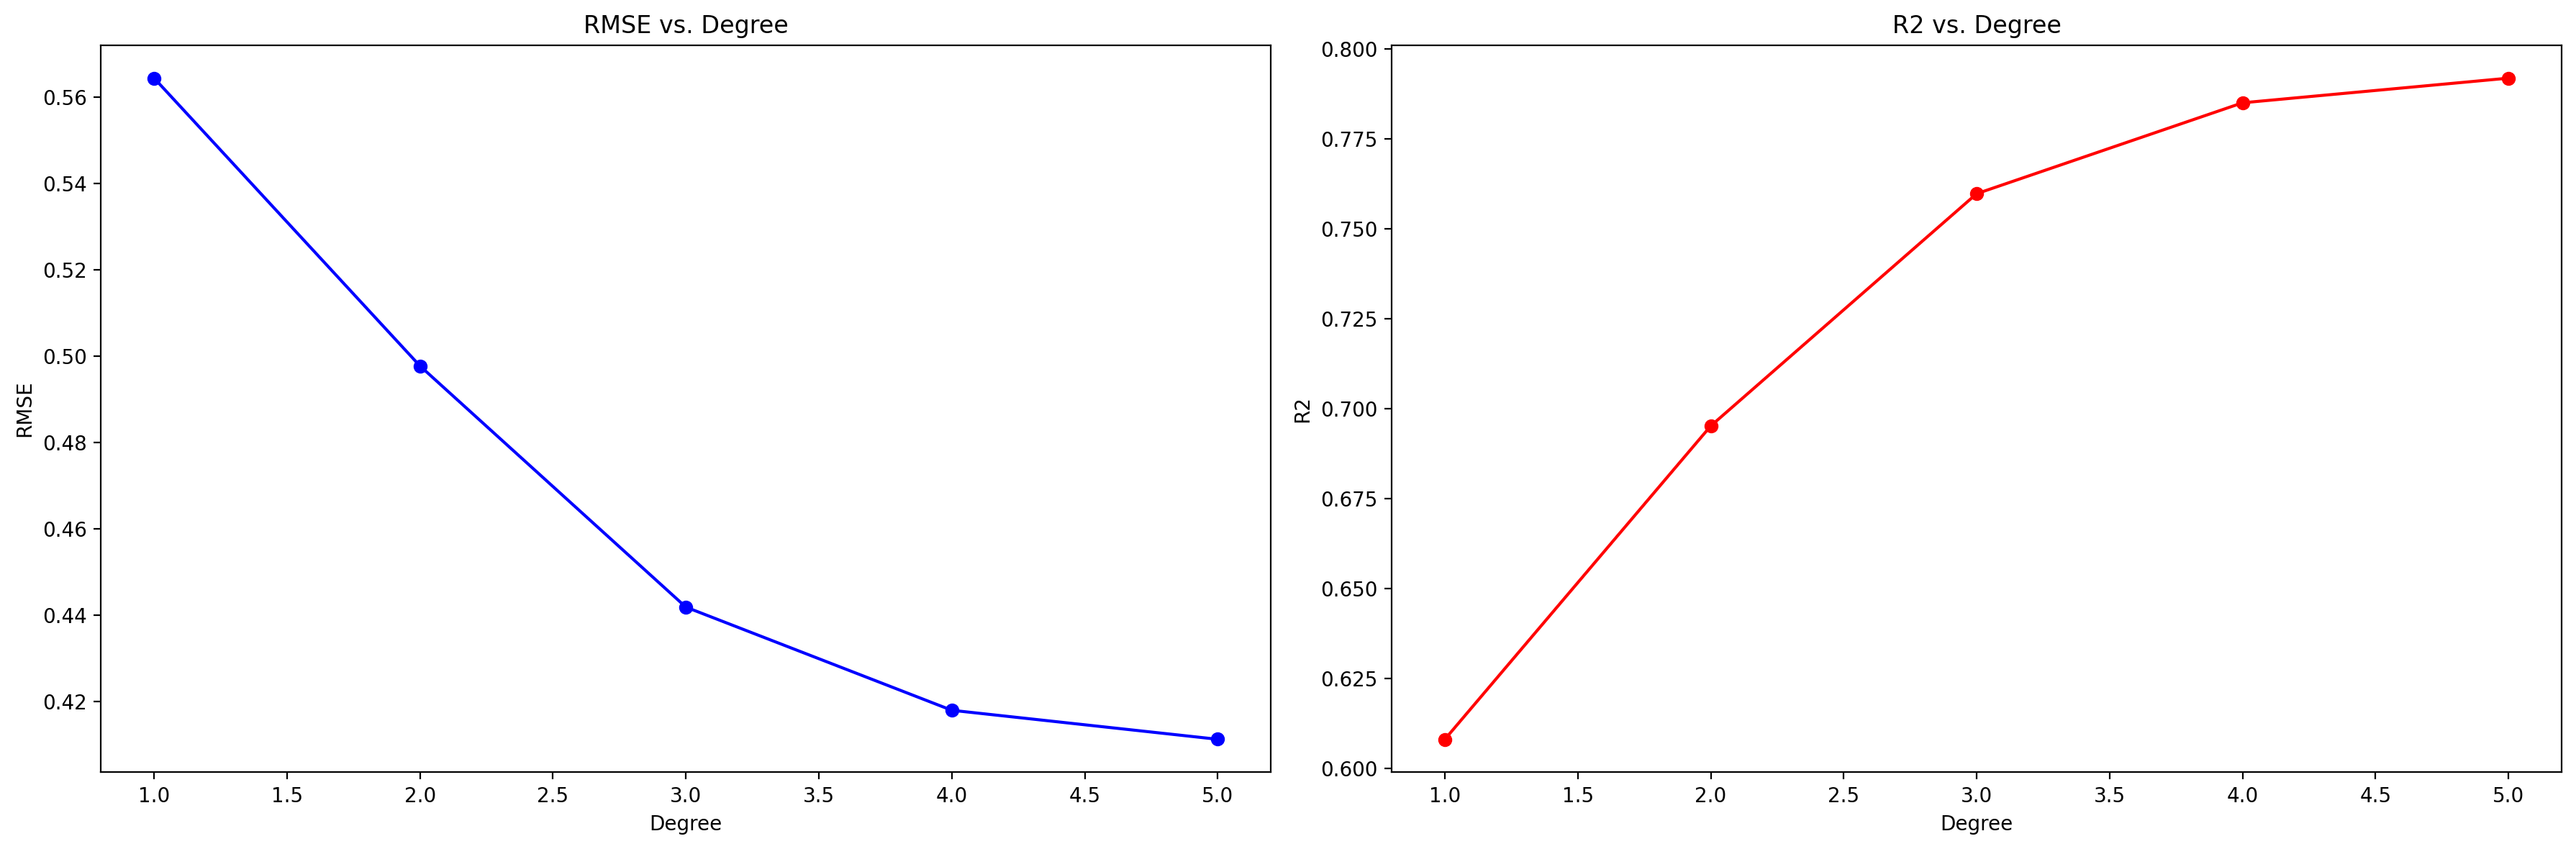

In [14]:
fig_title = 'polynomial_degree_sample_80'
fig, axes = plt.subplots(1, 2 , figsize=(18, 6), dpi=200) # Adjust figure size as needed

# Plot RMSE vs. Degree
axes[0].plot(degrees, rmse_list, marker='o', linestyle='-', color='b')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE vs. Degree')

# Plot R² vs. Degree
axes[1].plot(degrees, r2_list, marker='o', linestyle='-', color='r')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('R2')
axes[1].set_title('R2 vs. Degree')

# Adjust layout
plt.tight_layout()
# plt.savefig(f'{image_path}/{fig_title}.png')
# Display the plot
plt.show()

#### From above graph it is confirm that least and highest value is the best degree for polynomial feature because degree is directly propotional with RMSE and Indirectly proportional to R2

## 2. Polynomial regression model

In [15]:
degree = get_degree(r2_list, rmse_list)
# Train polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Predictions
y_pred_poly = poly_model.predict(X_test) 

# Evaluation
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression - RMSE: {rmse_poly}, R2: {r2_poly} at degree {degree}')

0.7919300740763919
0.4112541391590415
5
Polynomial Regression - RMSE: 0.4112541391590415, R2: 0.7919300740763919 at degree 5


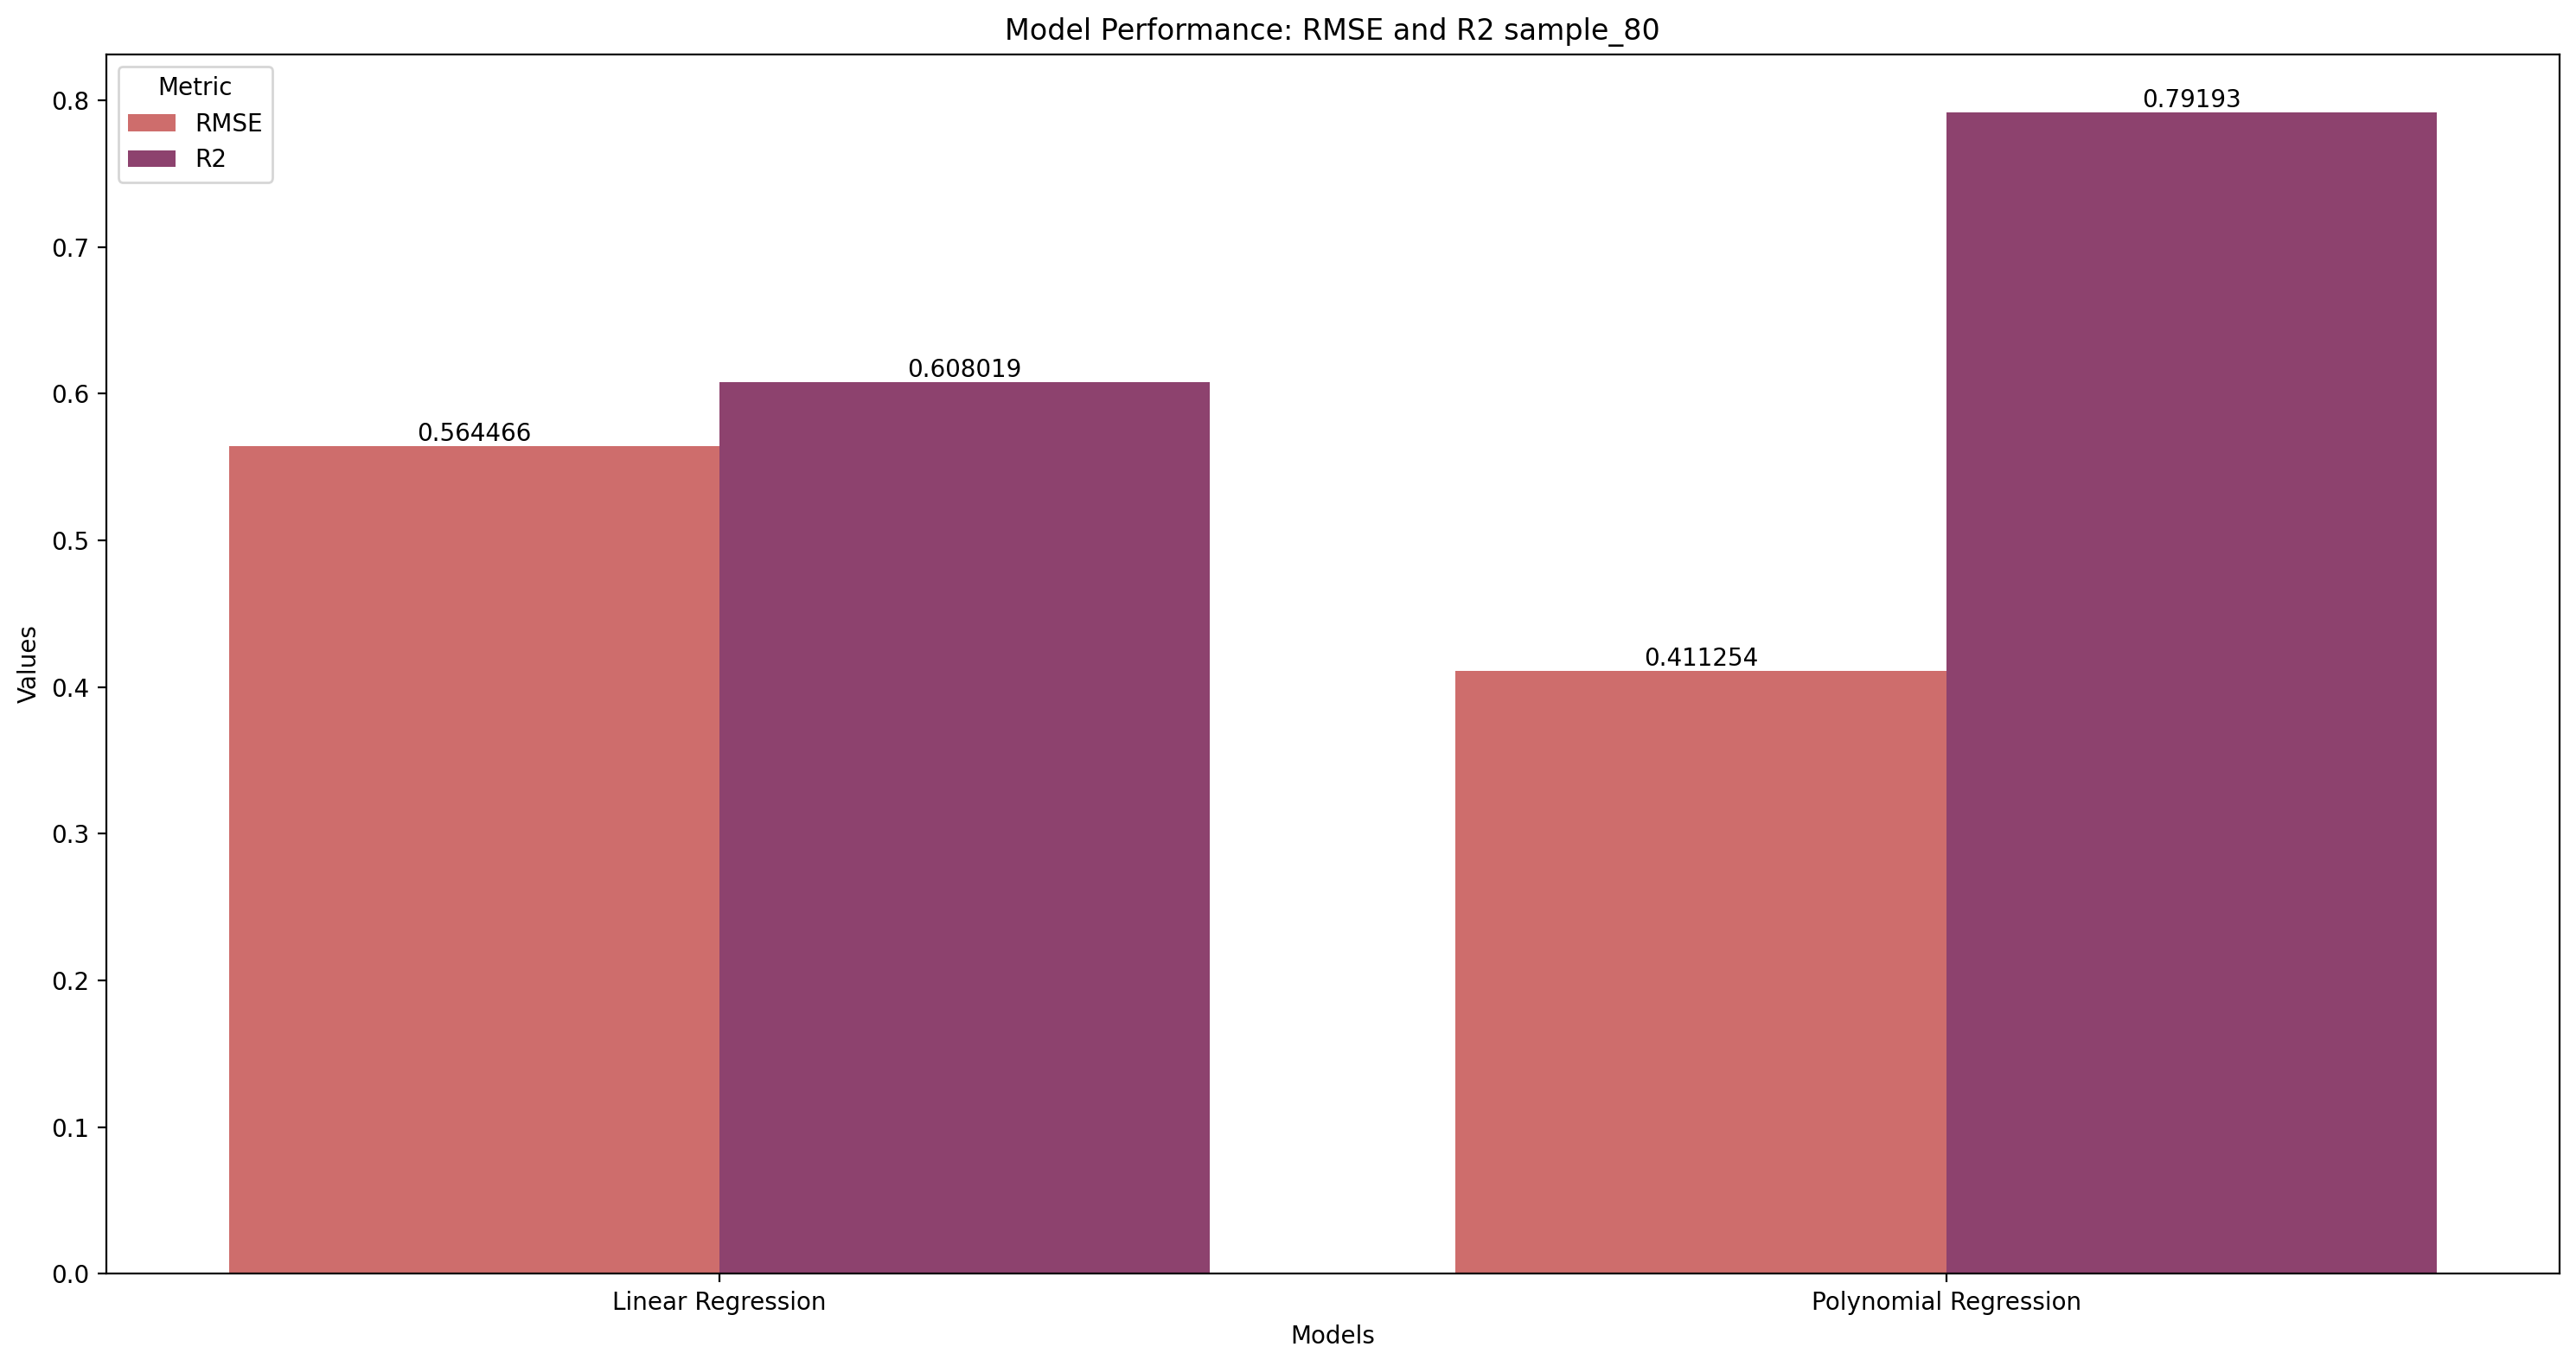

In [16]:
# Prepare the data
fig_title = 'Model Performance: RMSE and R2 sample_80'
data = {
    'Model': ['Linear Regression', 'Linear Regression', 'Polynomial Regression', 'Polynomial Regression'],
    'Metric': ['RMSE', 'R2', 'RMSE', 'R2'],
    'Value': [rmse_linear, r2_linear, rmse_poly, r2_poly]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create the bar plot using Seaborn
plt.figure(figsize=(15, 8), dpi = 200)
ax = sns.barplot(x='Model',
            y='Value',
            hue='Metric',
            data=df,
            palette=sns.color_palette('flare', n_colors=2)
    
           )

for i in range(2):
    ax.bar_label(ax.containers[i])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Values')
plt.title(fig_title)
plt.legend(title='Metric')
plt.savefig(f'{image_path}/{fig_title}.png')
plt.tight_layout()
plt.show()

### ML Models

In [17]:
# Custom Estimator to create a unified interface for model and grid search
class ModelPipeline(BaseEstimator, RegressorMixin):
    def __init__(self, model, params=None):
        self.model = model
        self.params = params
        self.best_model = None
        self.best_params = None
    
    def fit(self, X, y):
        if self.params:
            gs = GridSearchCV(self.model, self.params, cv=2)
            gs.fit(X, y)
            self.best_model = gs.best_estimator_
            self.best_params = gs.best_params_
        else:
            self.best_model = self.model.fit(X, y)
        return self.best_model
    
    def predict(self, X):
        return self.best_model.predict(X) if self.best_model else self.model.predict(X)
    
    def get_best_params(self):
        return self.best_params if self.best_params else None

# Define your models and hyperparameters
models = {
    "Random Forest": (RandomForestRegressor(), {
        'n_estimators': [8, 16, 32, 64, 128, 256]
    }),
    "Decision Tree": (DecisionTreeRegressor(), {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter': ['best', 'random']
    }),
    "Gradient Boosting": (GradientBoostingRegressor(), {
        'learning_rate': [.1, .01, .05, .001],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    }),
    "Linear Regression": (LinearRegression(), {}),
    # "Bayesian Ridge": (BayesianRidge(), {
    #     'alpha_1': [1e-06, 1e-05, 1e-04, 1e-03],
    #     'alpha_2': [1e-06, 1e-05, 1e-04, 1e-03],
    #     'lambda_1': [1e-06, 1e-05, 1e-04, 1e-03],
    #     'lambda_2': [1e-06, 1e-05, 1e-04, 1e-03]
    # }),
    "XGBRegressor": (XGBRegressor(), {
        'learning_rate': [.1, .01, .05, .001],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    }),
    "CatBoosting Regressor": (CatBoostRegressor(verbose=False), {
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'iterations': [30, 50, 100]
    }),
    "AdaBoost Regressor": (AdaBoostRegressor(), {
        'learning_rate': [.1, .01, 0.5, .001],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    }),
    "Artificial Neural Network": (Pipeline([
        ('scaler', StandardScaler()),   # Apply StandardScaler here
        ('ann', MLPRegressor(max_iter=2000))
    ]), {
        'ann__hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
        'ann__activation': ['relu', 'tanh'],
        'ann__solver': ['sgd', 'adam'],
        'ann__alpha': [0.0001, 0.05],
        'ann__learning_rate': ['constant', 'adaptive'],
    }),
    # "Support Vector Machine": (SVR(), {
    #     'kernel': ['linear', 'rbf'],  # Focus on the most useful kernels
    #     'C': [0.1, 1],  # Narrow the range
    #     'gamma': ['scale']  # Fixed gamma to 'scale'
    # }),
    "Polynomial Regression": (Pipeline([
        ('poly', PolynomialFeatures(degree=degree)), 
        ('linear', LinearRegression())
    ]), {
        'poly__degree': [degree],
    })
}

In [18]:
# Evaluate models with pipeline
def evaluate_models_pipeline(X_train, X_test, y_train, y_test, models):
    model_report = {}
    
    for model_name, (model, params) in models.items():
        print(f"Evaluating {model_name}...")
        
        # Train and evaluate model before tuning
        model_before_tuning = model.fit(X_train, y_train)
        y_train_pred_before = model_before_tuning.predict(X_train)
        y_test_pred_before = model_before_tuning.predict(X_test)
        
        train_r2_score_before = r2_score(y_train, y_train_pred_before)
        test_r2_score_before = r2_score(y_test, y_test_pred_before)
        test_mse_before = mean_squared_error(y_test, y_test_pred_before)
        test_mae_before = mean_absolute_error(y_test, y_test_pred_before)
        test_rmse_before = np.sqrt(test_mse_before)
        test_mape_before = mean_absolute_percentage_error(y_test, y_test_pred_before)
        
        # Create model pipeline and fit to training data (with tuning)
        pipeline = Pipeline([
            ('model', ModelPipeline(model, params))  # Model training with optional tuning
        ])
        
        # Fit the pipeline to the training data
        pipeline.fit(X_train, y_train)
        
        # Predict and calculate metrics for tuned models
        y_train_pred_after = pipeline.predict(X_train)
        y_test_pred_after = pipeline.predict(X_test)
        
        # Compute metrics for tuned model
        train_r2_score_after = r2_score(y_train, y_train_pred_after)
        test_r2_score_after = r2_score(y_test, y_test_pred_after)
        test_mse_after = mean_squared_error(y_test, y_test_pred_after)
        test_mae_after = mean_absolute_error(y_test, y_test_pred_after)
        test_rmse_after = np.sqrt(test_mse_after)
        test_mape_after = mean_absolute_percentage_error(y_test, y_test_pred_after)
        
        model_report[model_name] = {
            'train_r2_score_before': train_r2_score_before,
            'test_r2_score_before': test_r2_score_before,
            'test_mse_before': test_mse_before,
            'test_mae_before': test_mae_before,
            'test_rmse_before': test_rmse_before,
            'test_mape_before': test_mape_before,
            'train_r2_score_tuned': train_r2_score_after,
            'test_r2_score_tuned': test_r2_score_after,
            'test_mse_tuned': test_mse_after,
            'test_mae_tuned': test_mae_after,
            'test_rmse_tuned': test_rmse_after,
            'test_mape_tuned': test_mape_after,
            'best_params': pipeline.named_steps['model'].get_best_params() if pipeline.named_steps['model'].get_best_params() else None
        }
        
        print(f"  Score before tuning: {test_r2_score_before:.4f}")
        print(f"  Score after tuning:  {test_r2_score_after:.4f}")
        print(f"  Best parameters:     {pipeline.named_steps['model'].get_best_params()}")
        print()
    
    return model_report

# Evaluate models and get report
model_report = evaluate_models_pipeline(X_train, X_test, y_train, y_test, models)

Evaluating Random Forest...
  Score before tuning: 0.8589
  Score after tuning:  0.8599
  Best parameters:     {'n_estimators': 256}

Evaluating Decision Tree...
  Score before tuning: 0.7269
  Score after tuning:  0.7258
  Best parameters:     {'criterion': 'friedman_mse', 'splitter': 'best'}

Evaluating Gradient Boosting...
  Score before tuning: 0.8412
  Score after tuning:  0.8490
  Best parameters:     {'learning_rate': 0.1, 'n_estimators': 256}

Evaluating Linear Regression...
  Score before tuning: 0.6080
  Score after tuning:  0.6080
  Best parameters:     None

Evaluating XGBRegressor...
  Score before tuning: 0.8598
  Score after tuning:  0.8602
  Best parameters:     {'learning_rate': 0.1, 'n_estimators': 256}

Evaluating CatBoosting Regressor...
  Score before tuning: 0.8596
  Score after tuning:  0.8553
  Best parameters:     {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}

Evaluating AdaBoost Regressor...
  Score before tuning: 0.7625
  Score after tuning:  0.8116


#### Store Matrices of all model

In [19]:
 # Initialize a list to store the metrics data
metrics_data = []
sample_size = 0.80

# collect the metrices for each model
for model_name, metrics in model_report.items():
    metrics_data.append({
        'model_name': model_name,
        'sample_size': f'{int(sample_size*100)}%',
        'r2_score': metrics['test_r2_score_tuned'],
        'rmse': metrics['test_rmse_tuned'],
        'mse': metrics['test_mse_tuned'],
        'mae': metrics['test_mae_tuned'],
        'mape': metrics['test_mape_tuned']
    })


# Convert the list to a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Save the DataFrame to a CSV file
metrics_df.to_csv('../datasets/final_dataset/results/model_metrics_by_80_sample_size.csv', index=False)

### Matrics Comparision

3 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


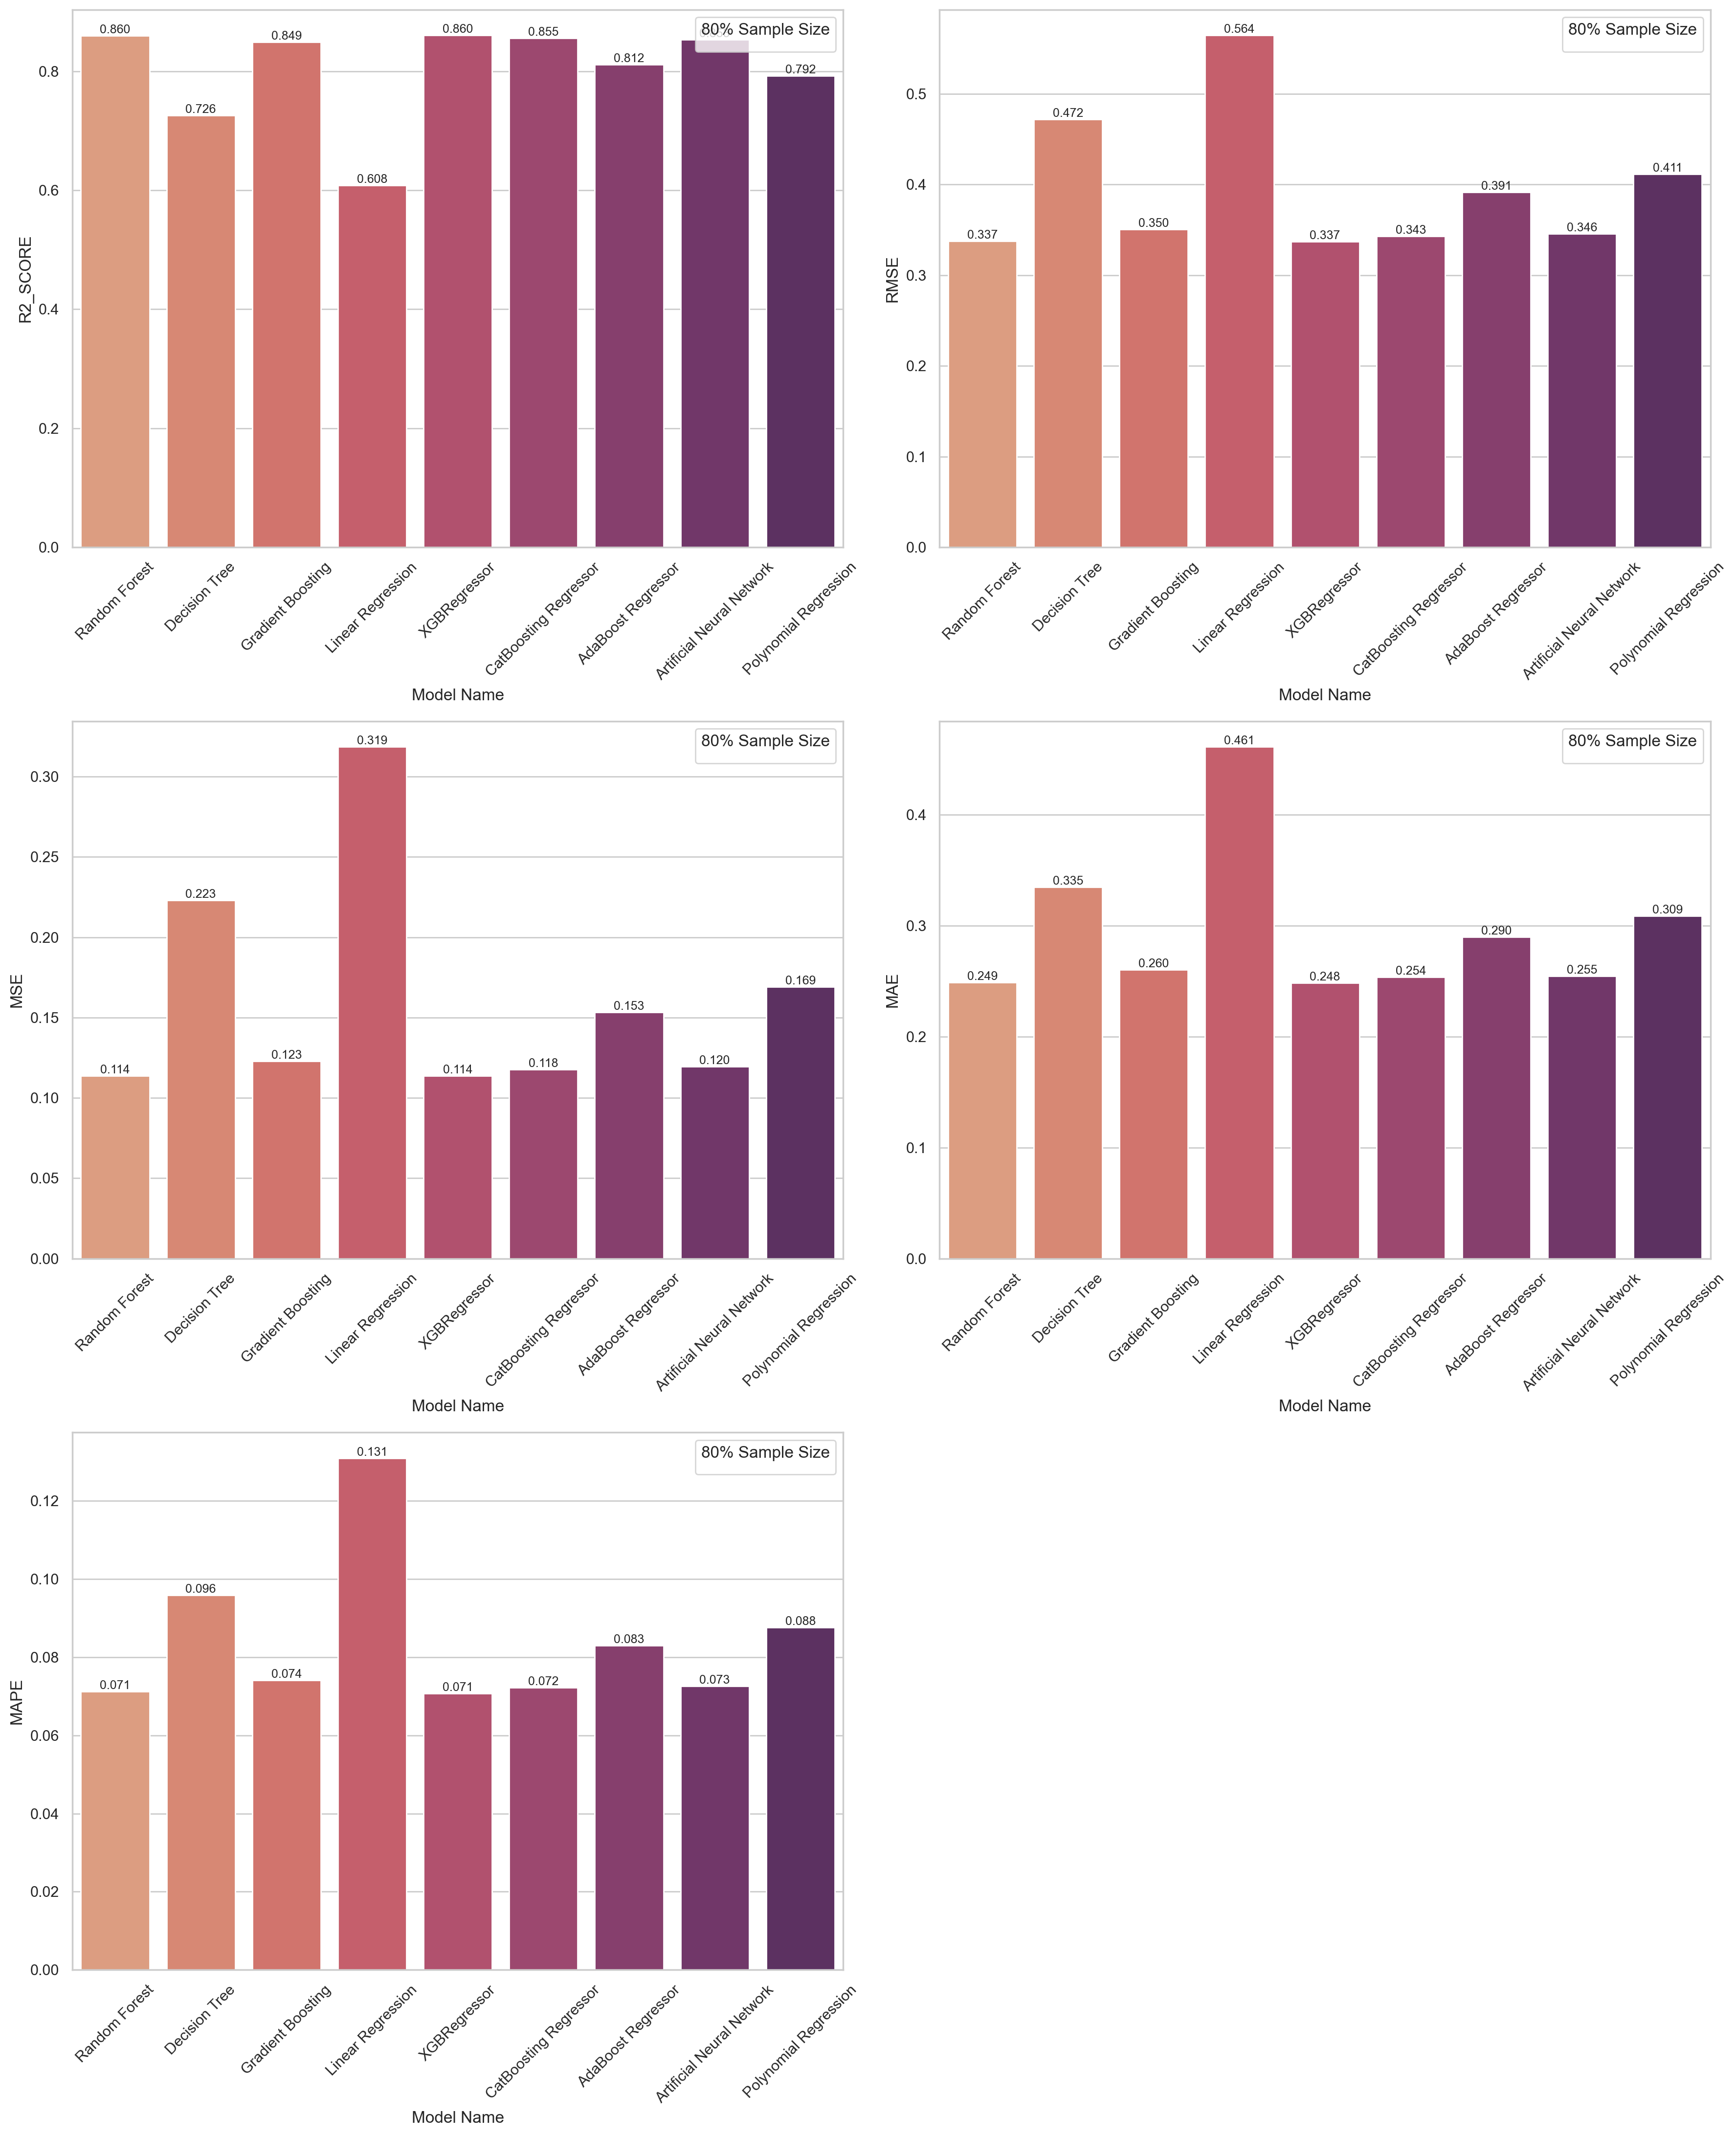

In [20]:
fig_title = 'model_metrics_comparison_80%.png'

# Set up the plotting style
sns.set(style="whitegrid")

# Plot each metric with sample size as a hue
metrics = ['r2_score', 'rmse', 'mse', 'mae', 'mape']

num_rows, num_columns = get_row_col_fig(metrics)
print(num_rows, num_columns)

fig, axes = plt.subplots(num_rows, num_columns , figsize=(18, 22), dpi=200)   # Adjust figure size as needed
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easy iteration

# Plot each metric in its respective subplot
for i, metric in enumerate(metrics):
    sns.barplot(
        x='model_name', y=metric, hue='model_name',
        data=metrics_df,  ax=axes[i],
        palette=color(len(metrics_data))
    )
    # axes[i].set_title(f'{metric.upper()} score Vs Model')
    axes[i].set_xlabel('Model Name')
    axes[i].set_ylabel(metric.upper())
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].legend(title='80% Sample Size' , loc='best')

    # Add labels to each bar
    for patch in axes[i].patches:
        height = patch.get_height()
        axes[i].text(
            patch.get_x() + patch.get_width() / 2., height, f'{height:.3f}', 
            ha='center', va='bottom', fontsize=9
        )

# Remove any empty subplots (if there are odd number of metrics)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.title('Model Metrics Comparision')
plt.savefig(f'{image_path}/{fig_title}.png', bbox_inches='tight')
plt.show()



In [21]:
# Function to find the best model based on a threshold
def get_best_model(model_report):
    best_result = None
    for model_name, metrics in model_report.items():
        test_r2_score = metrics.get('test_r2_score_tuned')
        if test_r2_score is not None and test_r2_score > 0.80:
            result = {
                'best_model_name': model_name,
                'best_model_train_score': np.round(metrics.get('train_r2_score_tuned', 0), 4),
                'best_model_score': np.round(test_r2_score, 4),
                'mean_squared_error': np.round(metrics.get('test_mse_tuned', 0), 4),
                'mean_absolute_error': np.round(metrics.get('test_mae_tuned', 0), 4),
                'root_mean_squared_error': np.round(np.sqrt(metrics.get('test_mse_tuned', 0)), 4),
                'mean_absolute_percentage_error': np.round(metrics.get('test_mape_tuned', 0), 4),
                'best_params': metrics.get('best_params')
            }
            
            if best_result is None or result['best_model_score'] > best_result['best_model_score']:
                best_result = result
    
    return best_result




In [22]:
# Get the best model
results = get_best_model(model_report.copy())

# Print the results
if results:
    print('Best Model Name: ', results['best_model_name'])
    print('Train Model r2_score: ', results['best_model_train_score'])
    print('Best Model r2_score: ', results['best_model_score'])
    print('Mean Squared Error: ', results['mean_squared_error'])
    print('Mean Absolute Error: ', results['mean_absolute_error'])
    print('Root Mean Squared Error: ', results['root_mean_squared_error'])
    print('Mean Absolute Percentage Error: ', results['mean_absolute_percentage_error'])
    print('Best Tuning Parameters: ', results['best_params'])
else:
    print('No models with test_r2_score_tuned > 0.80 found.')

Best Model Name:  XGBRegressor
Train Model r2_score:  0.8731
Best Model r2_score:  0.8602
Mean Squared Error:  0.1136
Mean Absolute Error:  0.2482
Root Mean Squared Error:  0.337
Mean Absolute Percentage Error:  0.0707
Best Tuning Parameters:  {'learning_rate': 0.1, 'n_estimators': 256}


#### Save the best model as pickle file

In [23]:
# Find and display the best model
best_model = get_best_model(model_report.copy())
print("Best Model:", best_model)

# Save the best model as a pickle file
best_model_name = best_model['best_model_name']
final_model = models[best_model_name][0].fit(X_train, y_train)

# Save the best model to a pickle file
with open(f'../model_pkl_file/best_model_{best_model_name}_80_sample.pkl', 'wb') as file:
    pickle.dump(final_model, file)

print(f"Best model '{best_model_name}' saved as 'best_model_{best_model_name}.pkl'")

Best Model: {'best_model_name': 'XGBRegressor', 'best_model_train_score': 0.8731, 'best_model_score': 0.8602, 'mean_squared_error': 0.1136, 'mean_absolute_error': 0.2482, 'root_mean_squared_error': 0.337, 'mean_absolute_percentage_error': 0.0707, 'best_params': {'learning_rate': 0.1, 'n_estimators': 256}}
Best model 'XGBRegressor' saved as 'best_model_XGBRegressor.pkl'


In [24]:
best_model_result = None
if results:
    best_model_name = results['best_model_name']
    best_params = results['best_params']
    
    model, _ = models[best_model_name]
    model.set_params(**best_params)
    
    # Retrain the model
    model.fit(X_train, y_train)
    
    # Predict and calculate final metrics
    y_train_pred_final = model.predict(X_train)
    y_test_pred_final = model.predict(X_test)
    
    final_train_r2 = r2_score(y_train, y_train_pred_final)
    final_test_r2 = r2_score(y_test, y_test_pred_final)
    final_test_mse = mean_squared_error(y_test, y_test_pred_final)
    final_test_mae = mean_absolute_error(y_test, y_test_pred_final)
    final_test_rmse = np.sqrt(final_test_mse)
    final_test_mape = mean_absolute_percentage_error(y_test, y_test_pred_final)
    
    print("\nFinal Model Evaluation after Retraining with Best Parameters:")
    print(f"Best Model Name: {results['best_model_name']}")
    print(f"Train R2 Score: {final_train_r2:.4f}")
    print(f"Test R2 Score: {final_test_r2:.4f}")
    print(f"Mean Squared Error: {final_test_mse:.4f}")
    print(f"Mean Absolute Error: {final_test_mae:.4f}")
    print(f"Root Mean Squared Error: {final_test_rmse:.4f}")
    print(f"Mean Absolute Percentage Error: {final_test_mape:.4f}")


    best_model_result = [{
        'model_name': results['best_model_name'],
        'r2_score': final_test_r2,
        'rmse': final_test_rmse,
        'mse': final_test_mse,
        'mae': final_test_mae,
        'mape': final_test_mape
    }]



Final Model Evaluation after Retraining with Best Parameters:
Best Model Name: XGBRegressor
Train R2 Score: 0.8731
Test R2 Score: 0.8602
Mean Squared Error: 0.1136
Mean Absolute Error: 0.2482
Root Mean Squared Error: 0.3370
Mean Absolute Percentage Error: 0.0707


     model_name    metric     value
0  XGBRegressor  r2_score  0.860250
1  XGBRegressor      rmse  0.337040
2  XGBRegressor       mse  0.113596
3  XGBRegressor       mae  0.248181
4  XGBRegressor      mape  0.070679 metrics_melted_df


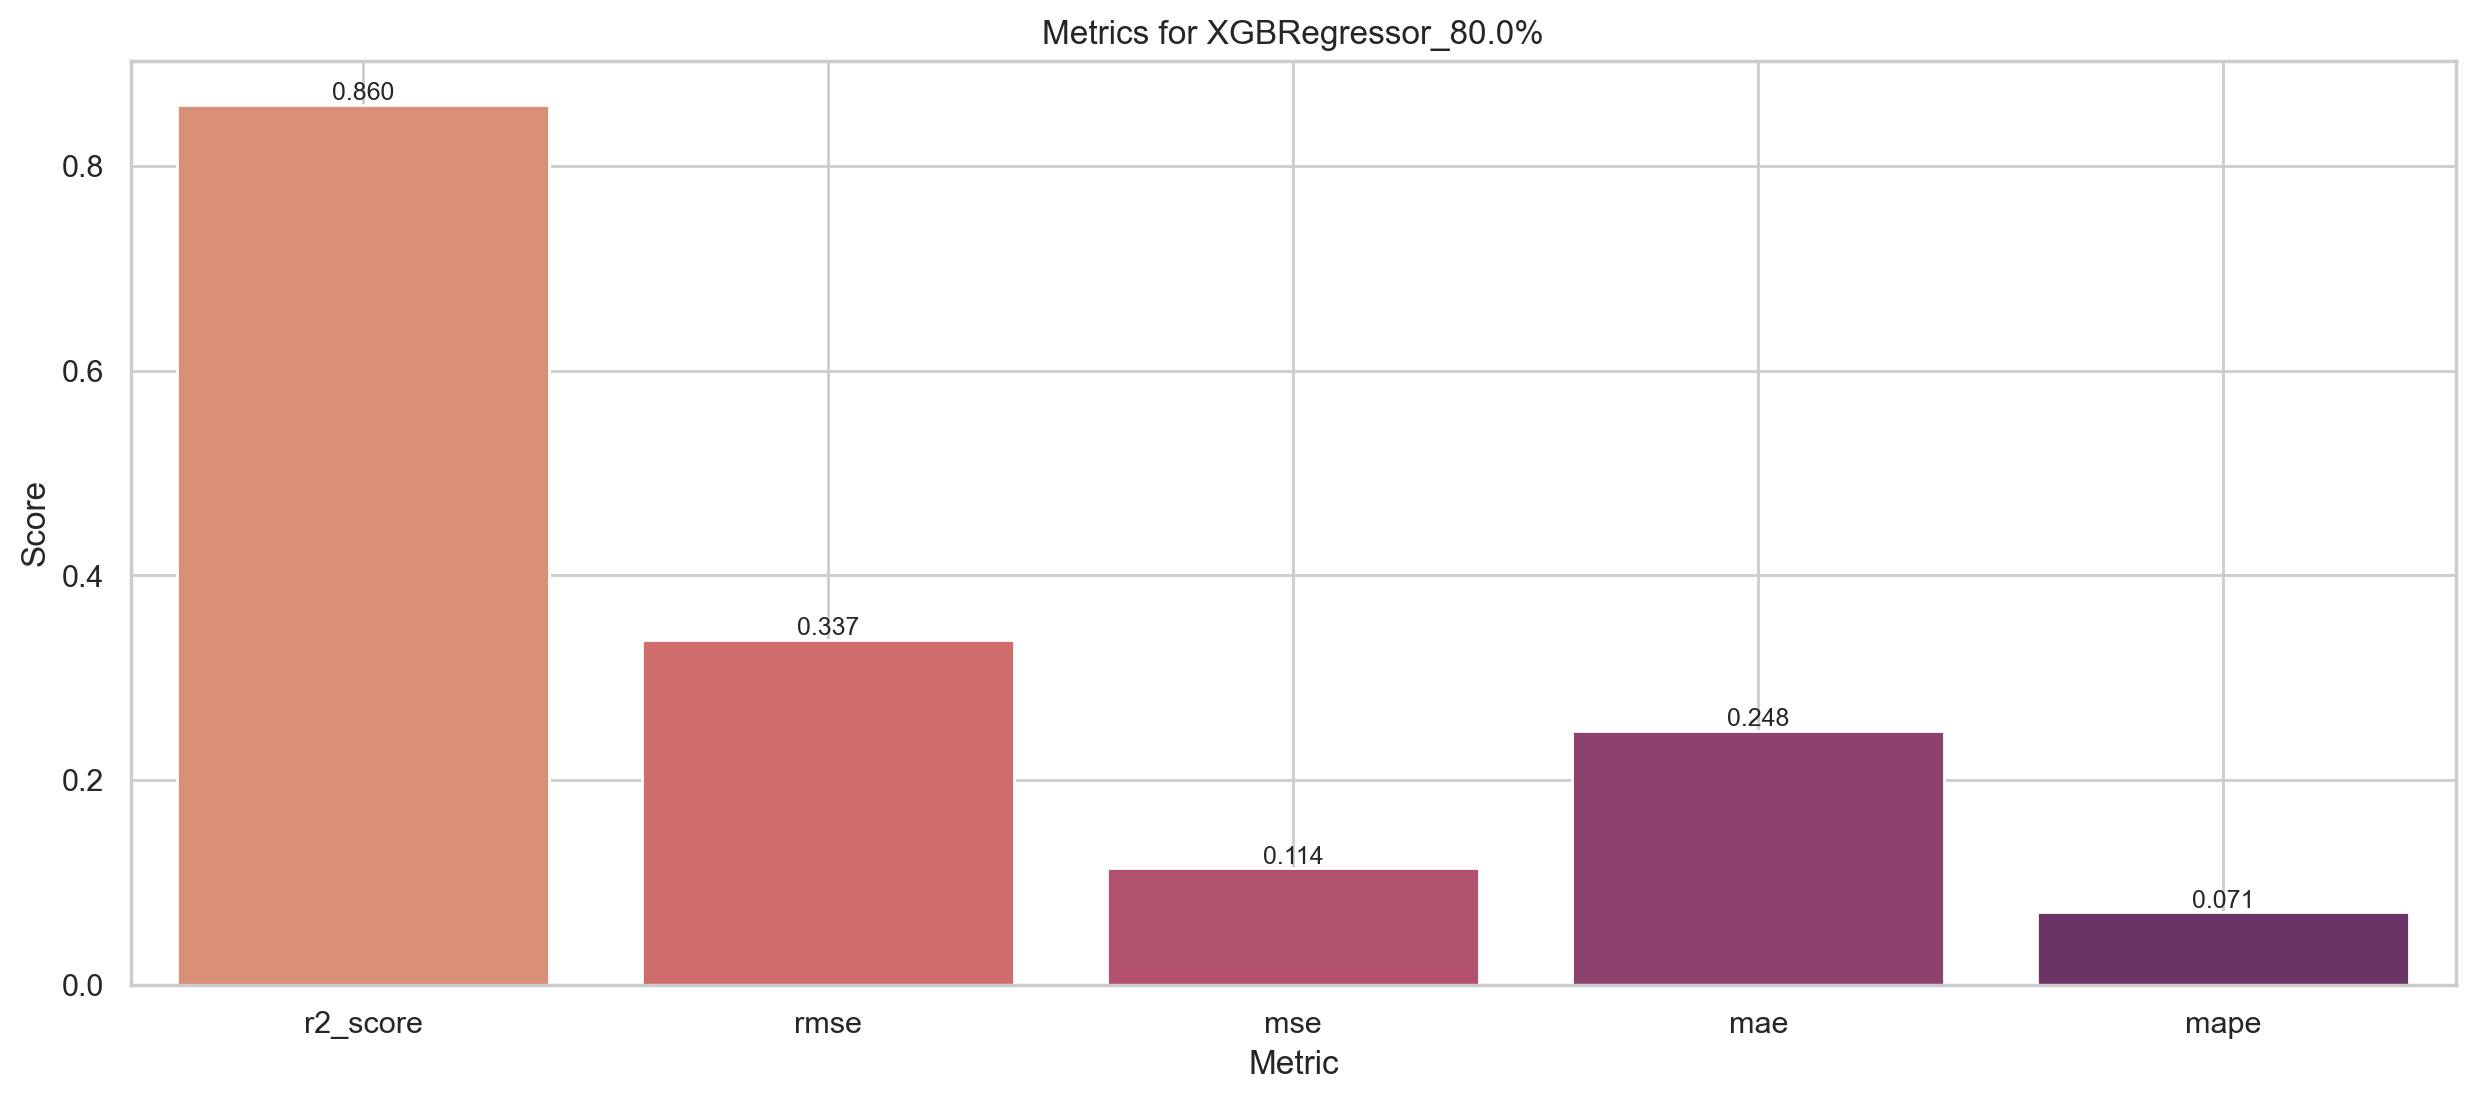

In [25]:
fig_title = f"Metrics for {results['best_model_name']}_{sample_size*100}%"

best_model_result_df = pd.DataFrame(best_model_result)
# print("best_model_result_df",best_model_result_df)

# Melt the DataFrame to long format
metrics_melted_df = best_model_result_df.melt(id_vars='model_name', var_name='metric', value_name='value')
print(metrics_melted_df,'metrics_melted_df')

# Save the DataFrame to a CSV file
metrics_melted_df.to_csv('../datasets/final_dataset/results/best_model_by_80_sample_size.csv', index=False)

# Plot each metric in a separate bar plot
metrics = metrics_melted_df['metric'].values

plt.figure(figsize=(15, 6), dpi = 200)
barplot = sns.barplot(x='metric', y='value', data=metrics_melted_df,  palette=color(len(metrics)), hue='metric')

# Add labels to each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.text(
        p.get_x() + p.get_width() / 2., height, f'{height:.3f}', 
        ha='center', va='bottom', fontsize=9
    )

# Customization
plt.title(fig_title)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.grid(True, axis='x')
plt.savefig(f'{image_path}/{fig_title}.png')
plt.show()

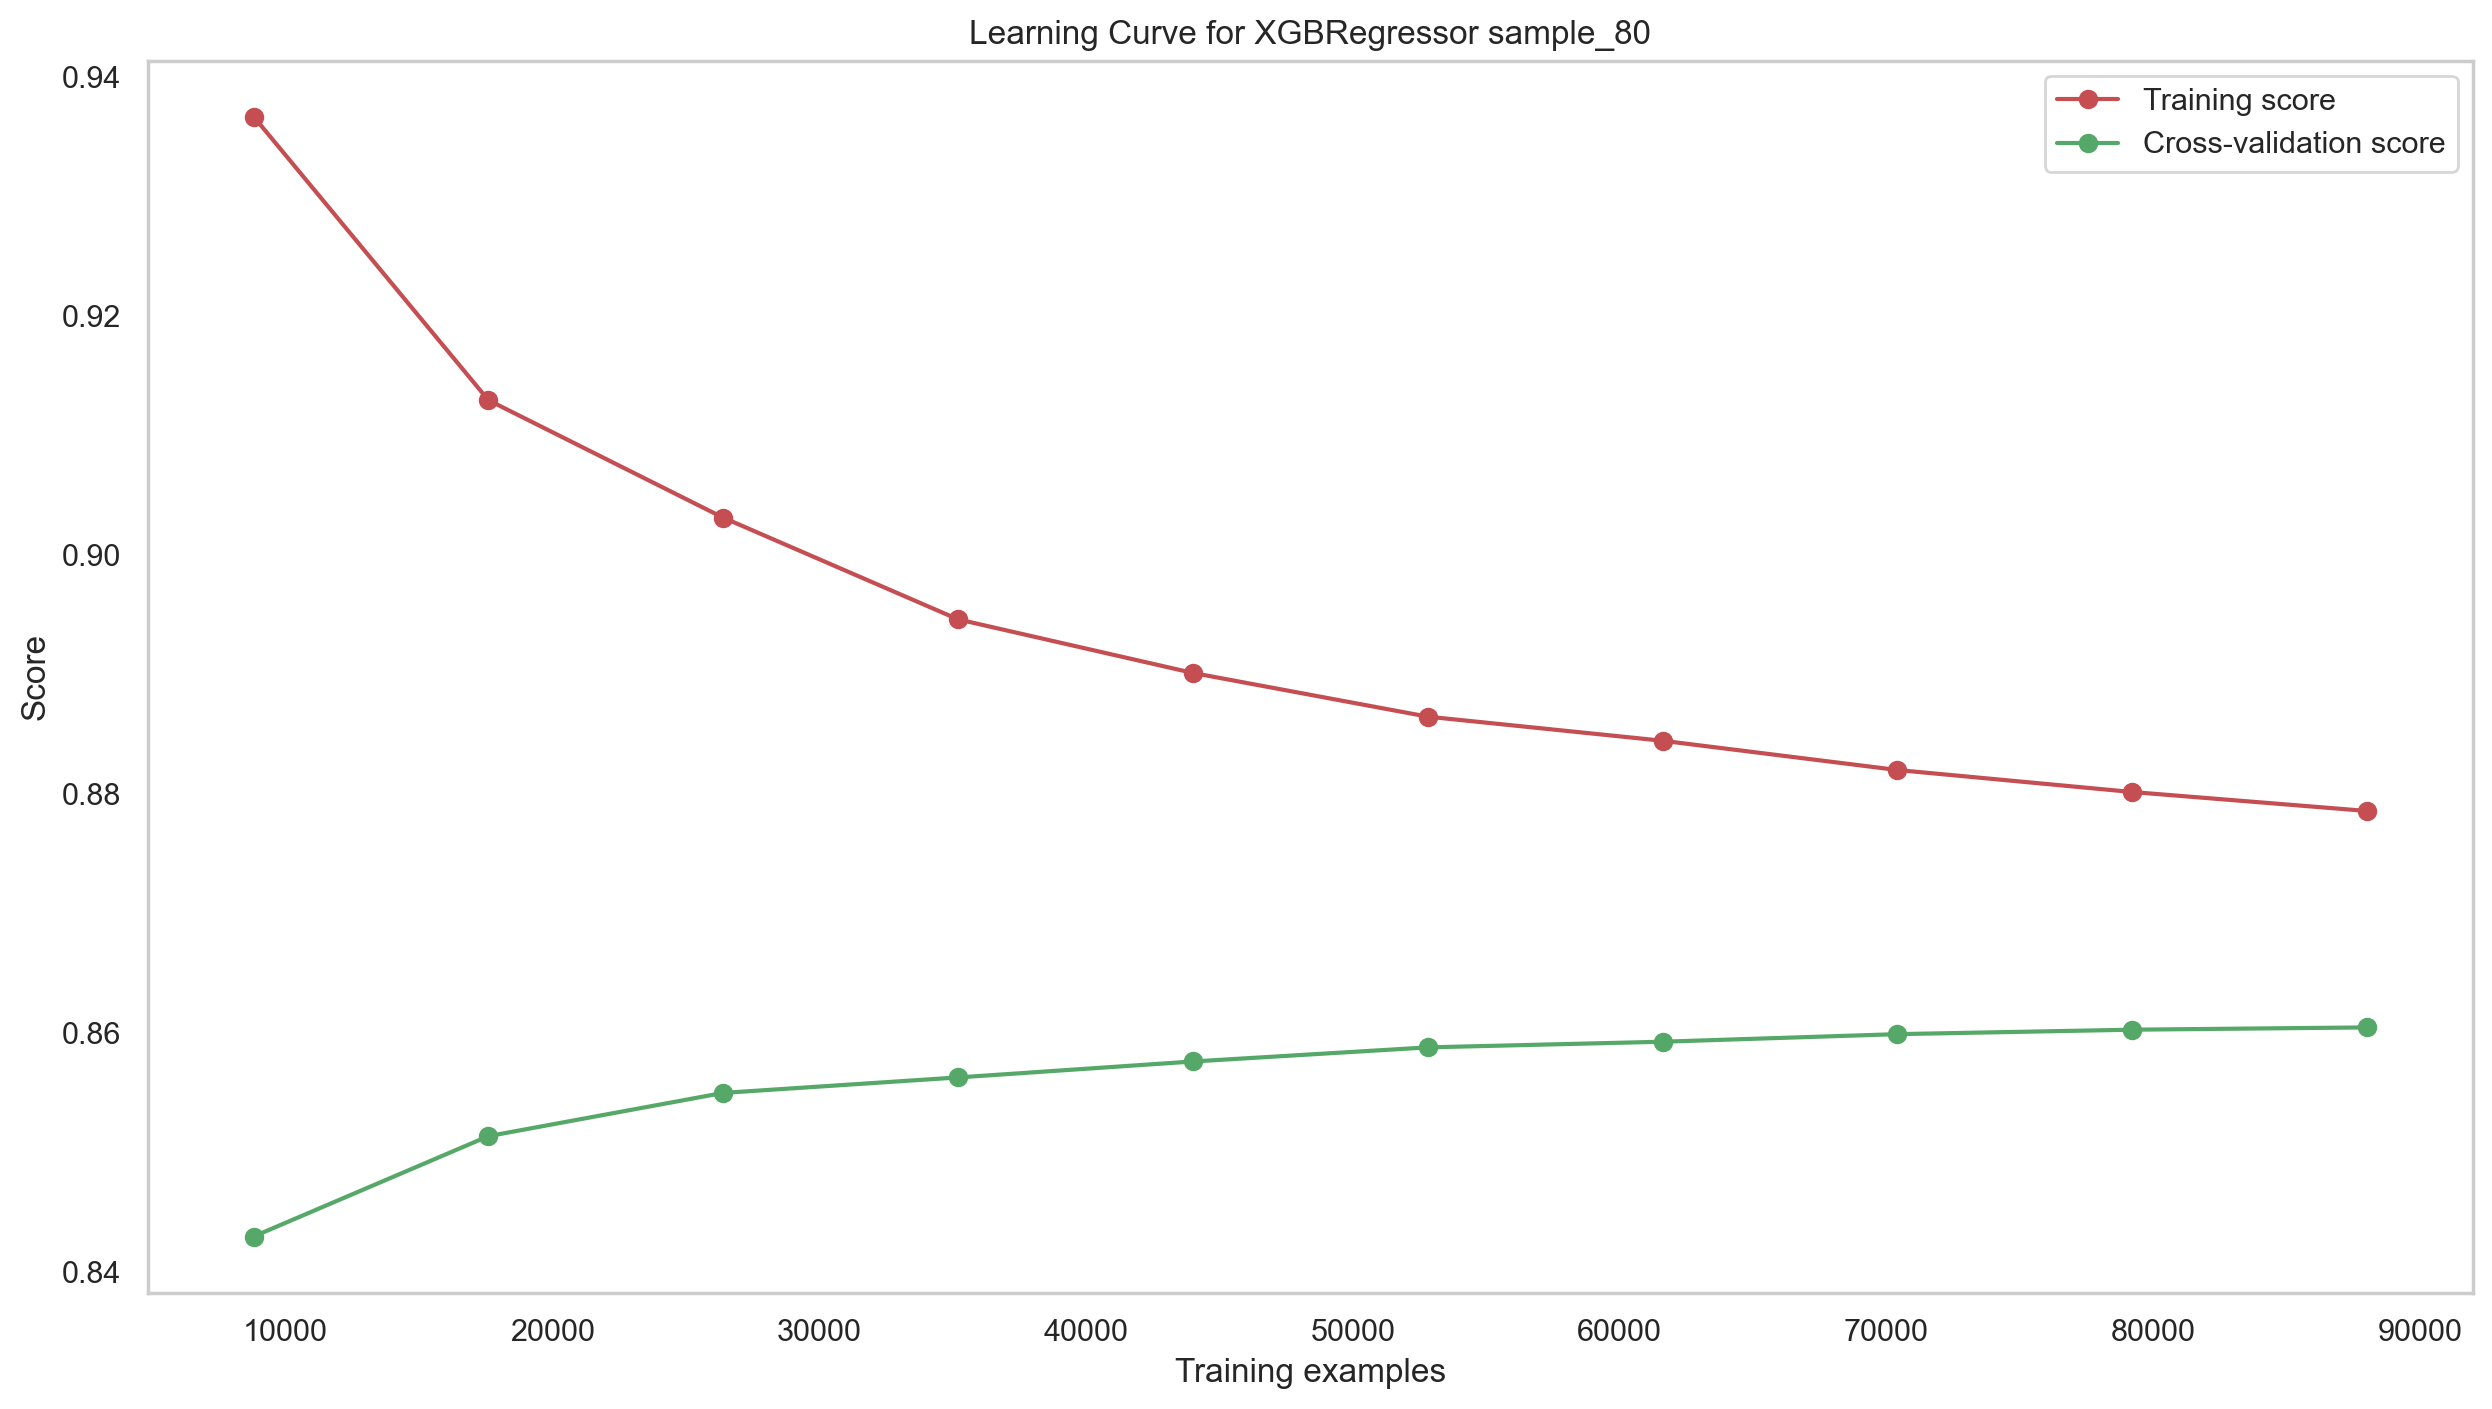

In [26]:

fig_title = f"Learning Curve for {best_model_name} sample_80"
# Visualizations for the best model
best_model_name = results['best_model_name']
best_model = models[best_model_name][0]

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=2, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(15, 8), dpi = 200)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title(fig_title)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.savefig(f'{image_path}/{fig_title}.png')
plt.show()



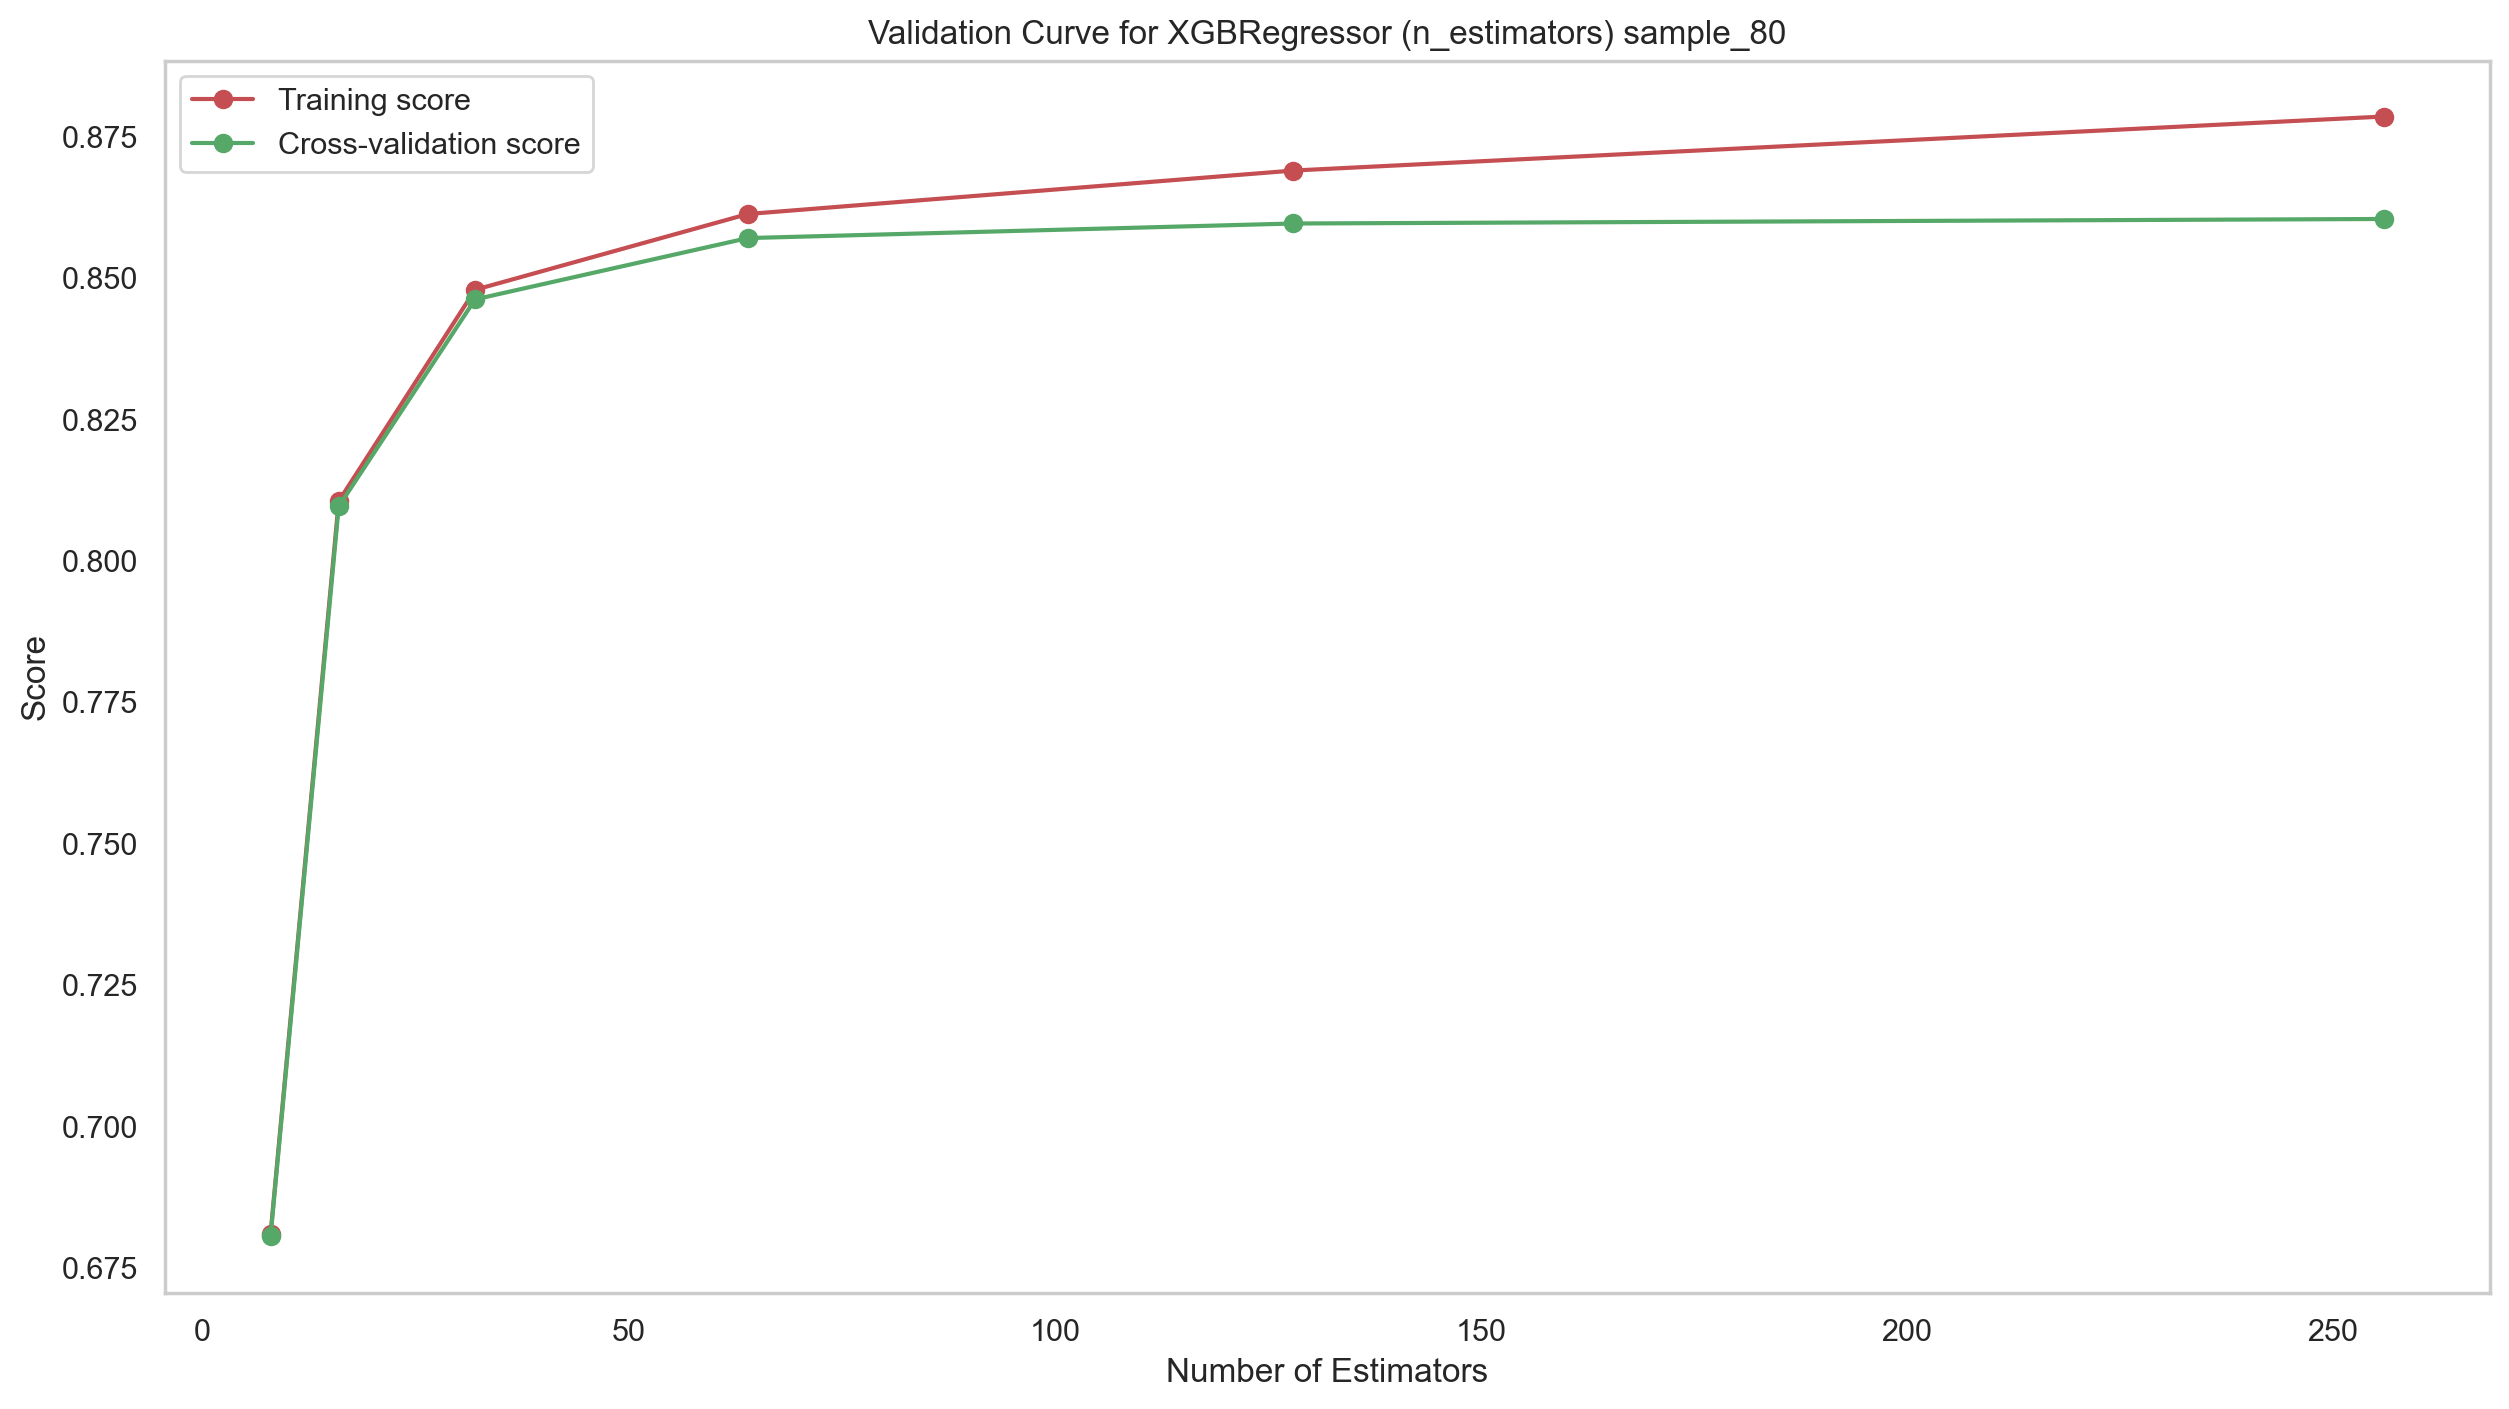

In [27]:
# Validation Curve (Example for hyperparameter 'n_estimators')
fig_title = f"Validation Curve for {best_model_name} (n_estimators) sample_80"
if 'n_estimators' in models[best_model_name][1]:
    param_range = models[best_model_name][1]['n_estimators']
    train_scores, test_scores = validation_curve(best_model, X_train, y_train, param_name='n_estimators', param_range=param_range, cv=2, scoring="r2", n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(15, 8), dpi = 200)
    plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(fig_title)
    plt.xlabel("Number of Estimators")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(f'{image_path}/{fig_title}.png')
    plt.show()

#### R-squared (R2 Score):

    - R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It ranges from 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean.
    - Higher values of R-squared indicate a better fit of the model to the data.

#### Mean Squared Error (MSE):
    - MSE measures the average squared difference between actual and predicted values. It gives more weight to larger errors.


#### Mean Absolute Error (MAE):
    - MAE measures the average absolute difference between actual and predicted values. It provides a more intuitive sense of average error magnitude.


#### Root Mean Squared Error (RMSE):
    - RMSE is the square root of the MSE and provides a measure of the spread of the residuals (errors) in the model. It's in the same unit as the dependent variable.